In [1]:
import pybamm as pb;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
import scipy.optimize
import random;import time, signal

In [2]:
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip\Rio_Code\Fun_P3"))
sys.path.append(str_path_1) 
from Fun_P3 import *

In [3]:
fs=17;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [ ]:
# collect .xlsx result if haven't
Index = np.arange(1,6+1) 
BasicPath = 'C:/Users/rl1120/OneDrive - Imperial College London/SimDataSave/P3R13/'
Targets = [
    "Landes_int=1e_19_2000cyc","Landes_sol=5e_21_2000cyc",
    ]
for target in Targets:
    i_find = target.index('=')
    book_name_xlsx = target[0:i_find] + '.xlsx'
    for k in Index:
        old_book = str(k) + '_' + book_name_xlsx
        #print(old_book)
        #open excel:
        try:   # use try just in case some cases fail
            data_old = openpyxl.load_workbook(BasicPath + target +'/' + old_book)   
            data_tar = openpyxl.load_workbook(BasicPath + target +'/' + book_name_xlsx) 

            table_old = data_old[str(k)]
            nrows_old = table_old.max_row  # 获得行数
            ncolumns_old = table_old.max_column  # 获得列数

            tar_sheet_name_xlsx = 'Results';
            table_tar = data_tar[tar_sheet_name_xlsx]
            nrows_tar = table_tar.max_row  # 获得行数
            ncolumns_old = table_old.max_column  # 获得列数
            list_old = [];
            #print(nrows_old,nrows_tar)
            for i in range(1,nrows_old+1):
                for j in range(1,ncolumns_old+1):
                    list_old.append(table_old.cell(row=i,column=j).value)

            list_old = [list_old,]
            for i in range(1, len(list_old)+1):
                for j in range(1, len(list_old[i-1])+1):
                    #print(i,j,list_old[i-1][j-1]    )
                    table_tar.cell(nrows_tar+i, j).value = list_old[i-1][j-1]     
            data_tar.save(BasicPath + target +'/' + book_name_xlsx) 
            data_tar.close()
        except:
            print(f"Something goes wrong for Scan {k} for folder {target}!")
        else:
            print(f"Successfuly write results for Scan {k} for folder {target}!") 


In [5]:
# Reload all scans in this round! 
Index = np.arange(1,6+1) 
# C:\Users\rl1120\OneDrive - Imperial College London\SimDataSave\P3R13
BasicPath = 'C:/Users/rl1120/OneDrive - Imperial College London/SimDataSave/P3R13/Round220320/'
Targets = [
    "Landes_int=1e_19_2000cyc","Landes_sol=5e_21_2000cyc",]
Scan_Num = [6,6]
Round220320 = {}
for target,scan_num in zip(Targets,Scan_Num):
    Round220320[target] = {}
    Scans = np.arange(1,scan_num+1,1).tolist()
    for scan in Scans:
        Round220320[target][str(scan)]={}
        try:
            Round220320[target][str(scan)] = loadmat( 
            BasicPath  +   target+ "/" + str(scan) + "th Scan/" 
            + str(scan)+ "th Scan-for_AGE_only.mat")
        except:
            print(f"Nothing in {target}, Scan {scan}")

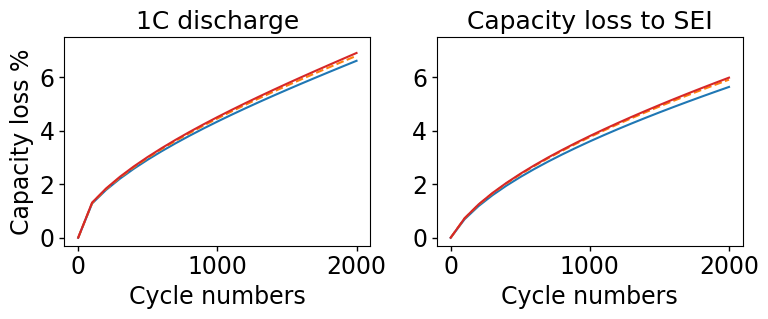

In [9]:
target = "Landes_int=1e_19_2000cyc"; dpi=800
Colors = ['#1f77b4','#ff7f0e','#d62728',];Markers   = ["none","none","none","none"];
LS = ['-','--','-','--'];

Labels = ["Single-High Dx","Double-Low Dx","Double-High Dx",] 
Scans = [3,6,5,]; 

fig, axs = plt.subplots(1,2, figsize=(8,3.5),tight_layout=True)
for k,Scan_i in enumerate(Scans):
    cap_temp = Round220320[target][str(Scan_i)]["Discharge capacity [A.h]"][0]
    axs[0].plot(
        Round220320[target][str(Scan_i)]["Full_cycle"][0], 
        (1-cap_temp/cap_temp[0])*100,
        color=Colors[k],linestyle=LS[k],  label=Labels[k])   # marker=Markers[k],
    axs[0].set_ylabel("Capacity loss %",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0].set_title("1C discharge",   fontdict={'family':'DejaVu Sans','size':fs+1})
    cap_sei = Round220320[target][str(Scan_i)]["CDend Loss of capacity to SEI [A.h]"][0]
    axs[1].plot(
        Round220320[target][str(Scan_i)]["Full_cycle"][0], 
        cap_sei / cap_temp[0] * 100 , 
        color=Colors[k],linestyle=LS[k],  label=Labels[k])
    #axs[1].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[1].set_title("Capacity loss to SEI",   fontdict={'family':'DejaVu Sans','size':fs+1})

    """ axs[2].plot(
        Round220320[target][str(Scan_i)]["Full_cycle"][0], 
        Round220320[target][str(Scan_i)]["CDend Local ECM resistance [Ohm]"][0], 
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    axs[2].set_ylabel("Resistance [Ohm]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[2].set_title("Local ECM resistance",   fontdict={'family':'DejaVu Sans','size':fs+1}) """
    for i in range(0,2):
        axs[i].set_ylim(-0.3,7.5); 
        axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1)
    #axs[1].legend(prop={'family':'DejaVu Sans','size':fs-6},loc='best',frameon=False)

BasicPath_save = "C:/Users/rl1120/OneDrive - Imperial College London/SimDataSave/P3R13/"  #'D:/OneDrive - Imperial College London/SimDataSave/P3R13/'; 
target_save  = 'Revised_Poster/' 

plt.savefig(BasicPath_save +   target_save+ "Cap loss in percentage Single_Double_Both_Dx.png", dpi=dpi)

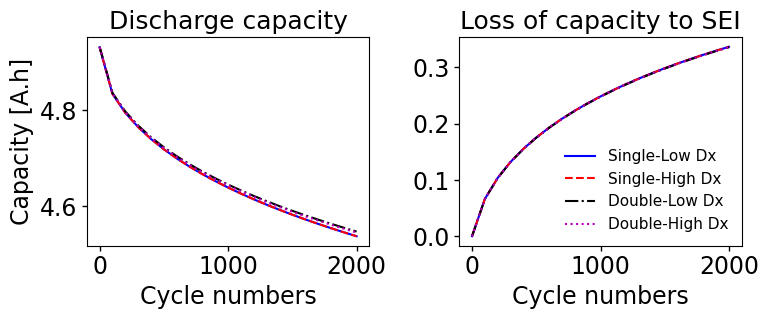

In [30]:
target = "Landes_sol=5e_21_2000cyc"; dpi=600
Colors    = ["b","r","k","m"];Markers   = ["none","none","none","none"];Linestyles= ["-","--","-.",":"]
Labels = ["Single-Low Dx","Single-High Dx","Double-Low Dx","Double-High Dx",] 
Scans = [4,3,6,5]; 
fig, axs = plt.subplots(1,2, figsize=(8,3.5),tight_layout=True)
for k,Scan_i in enumerate(Scans):
    axs[0].plot(
        Round220320[target][str(Scan_i)]["Full_cycle"][0], 
        Round220320[target][str(Scan_i)]["Discharge capacity [A.h]"][0],
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    axs[0].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0].set_title("Discharge capacity",   fontdict={'family':'DejaVu Sans','size':fs+1})

    axs[1].plot(
        Round220320[target][str(Scan_i)]["Full_cycle"][0], 
        Round220320[target][str(Scan_i)]["CDend Loss of capacity to SEI [A.h]"][0], 
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    #axs[1].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[1].set_title("Loss of capacity to SEI",   fontdict={'family':'DejaVu Sans','size':fs+1})
    for i in range(0,2):
        axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1)
    axs[1].legend(prop={'family':'DejaVu Sans','size':fs-6},loc='best',frameon=False)
plt.savefig(BasicPath +   target+ "Single_Double_Both_Dx.png", dpi=dpi)

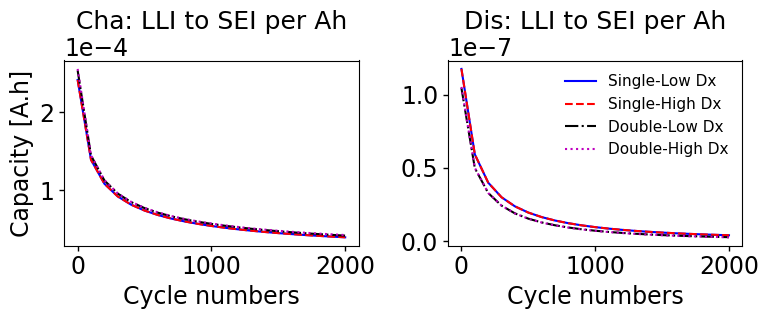

In [38]:
target = "Landes_int=1e_19_2000cyc"; dpi=600
Colors    = ["b","r","k","m"];Markers   = ["none","none","none","none"];Linestyles= ["-","--","-.",":"]
Labels = ["Single-Low Dx","Single-High Dx","Double-Low Dx","Double-High Dx",] 
Scans = [4,3,6,5]; 
fig, axs = plt.subplots(1,2, figsize=(8,3.5),tight_layout=True)
for k,Scan_i in enumerate(Scans):
    axs[0].plot(
        Round220320[target][str(Scan_i)]["Full_cycle"][0], 
        Round220320[target][str(Scan_i)]["Cha LLI to SEI per Ah"][0],
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    axs[0].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0].set_title("Cha: LLI to SEI per Ah",   fontdict={'family':'DejaVu Sans','size':fs+1})

    axs[1].plot(
        Round220320[target][str(Scan_i)]["Full_cycle"][0], 
        Round220320[target][str(Scan_i)]["Dis LLI to SEI per Ah"][0], 
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    #axs[1].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[1].set_title("Dis: LLI to SEI per Ah",   fontdict={'family':'DejaVu Sans','size':fs+1})
    for i in range(0,2):
        axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[i].ticklabel_format( 
            axis='y', style='sci',scilimits=[-0.01,0.01], 
            useOffset=None, useLocale=None, useMathText=None)
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1)
    axs[1].legend(prop={'family':'DejaVu Sans','size':fs-6},loc='best',frameon=False)
plt.savefig(BasicPath +   target+ "LLI to SEI both charge and discharge.png", dpi=dpi)

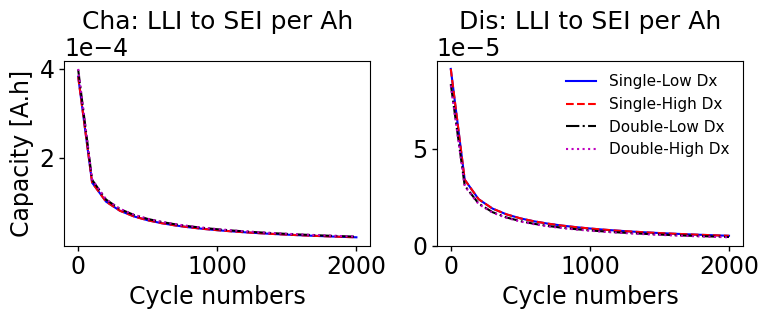

In [37]:
target = "Landes_sol=5e_21_2000cyc"; dpi=600
Colors    = ["b","r","k","m"];Markers   = ["none","none","none","none"];Linestyles= ["-","--","-.",":"]
Labels = ["Single-Low Dx","Single-High Dx","Double-Low Dx","Double-High Dx",] 
Scans = [4,3,6,5]; 
fig, axs = plt.subplots(1,2, figsize=(8,3.5),tight_layout=True)
for k,Scan_i in enumerate(Scans):
    axs[0].plot(
        Round220320[target][str(Scan_i)]["Full_cycle"][0], 
        Round220320[target][str(Scan_i)]["Cha LLI to SEI per Ah"][0],
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    axs[0].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0].set_title("Cha: LLI to SEI per Ah",   fontdict={'family':'DejaVu Sans','size':fs+1})

    axs[1].plot(
        Round220320[target][str(Scan_i)]["Full_cycle"][0], 
        Round220320[target][str(Scan_i)]["Dis LLI to SEI per Ah"][0], 
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    #axs[1].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[1].set_title("Dis: LLI to SEI per Ah",   fontdict={'family':'DejaVu Sans','size':fs+1})
    for i in range(0,2):
        axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[i].ticklabel_format( 
            axis='y', style='sci',scilimits=[-0.01,0.01], 
            useOffset=None, useLocale=None, useMathText=None)
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1)
    axs[1].legend(prop={'family':'DejaVu Sans','size':fs-6},loc='best',frameon=False)
plt.savefig(BasicPath +   target+ "LLI to SEI both charge and discharge.png", dpi=dpi)